In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms

In [3]:
train_data=torchvision.datasets.FashionMNIST( 
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
    )

In [4]:
train_loader=torch.utils.data.DataLoader(train_data,1000,shuffle=True)

In [5]:
sample=next(iter(train_loader))

In [6]:
image,label=sample 


In [7]:
image.shape

torch.Size([1000, 1, 28, 28])

In [8]:
image.squeeze().shape

torch.Size([1000, 28, 28])

In [9]:
image[0].squeeze().shape

torch.Size([28, 28])

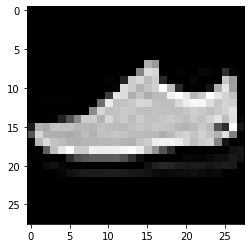

In [22]:
plt.imshow(image[2].squeeze(),cmap='gray')

In [11]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()      # color channel initially =1 because grayscale
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) #Kernel size=(5,5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) # Color Channels=12

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120) 
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4) # 4*4 represents height and width of the image.
        t = self.fc1(t)               # 28*28 got converted to 4*4 because of Pooling operations
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)

        return t

In [12]:
net=Network()

In [13]:
net

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [14]:
optimizer=optim.Adam(net.parameters(),lr=0.001)

In [15]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [16]:
for epoch in range(100):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = net(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch+1, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

epoch 1 total_correct: 28706 loss: 90.61659210920334
epoch 2 total_correct: 41241 loss: 48.644272804260254
epoch 3 total_correct: 43952 loss: 41.78227323293686
epoch 4 total_correct: 45396 loss: 37.935465693473816
epoch 5 total_correct: 46541 loss: 35.29988259077072
epoch 6 total_correct: 47316 loss: 33.233697444200516
epoch 7 total_correct: 48101 loss: 31.55356827378273
epoch 8 total_correct: 48775 loss: 30.128227949142456
epoch 9 total_correct: 49333 loss: 28.885958164930344
epoch 10 total_correct: 49830 loss: 27.7764151096344
epoch 11 total_correct: 50306 loss: 26.69041681289673
epoch 12 total_correct: 50429 loss: 26.23859778046608
epoch 13 total_correct: 50790 loss: 25.369631946086884
epoch 14 total_correct: 50877 loss: 24.866614043712616
epoch 15 total_correct: 51193 loss: 24.198722779750824
epoch 16 total_correct: 51312 loss: 23.847261488437653
epoch 17 total_correct: 51397 loss: 23.59489005804062
epoch 18 total_correct: 51743 loss: 22.88512548804283
epoch 19 total_correct: 51868

In [17]:
print("Accuracy:",total_correct/len(train_data) )

Accuracy: 0.9203833333333333


In [19]:
test_data=torchvision.datasets.FashionMNIST( 
    root='./datatest',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
    )




Extracting ./datatest\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./datatest\FashionMNIST\raw


Extracting ./datatest\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./datatest\FashionMNIST\raw


Extracting ./datatest\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./datatest\FashionMNIST\raw




Extracting ./datatest\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./datatest\FashionMNIST\raw
Processing...


c:\users\soham\appdata\local\programs\python\python38\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
